In [1]:
import pandas as pd

In [2]:
#Reading data obtained from the City of Biel (link: https://opendata.swiss/de/dataset/baumkataster2)
df = pd.read_excel('e331_baumkataster.xlsx')

In [3]:
#The dataframe is bilingual, so first I got rid of all the columns in french
df_de = df.drop(columns=["typ_fr", "name_fr", "status_fr"])
df_de.head()

,t_id,baumnr,typ_de,name_de,name_bot,kurzname,gattung,art,sorte,status_de,oeko_wert,pflanzjahr,aufnahmedatum,faelldatum,stand,e,n,h_2023
0,1,10000,Laubbaum,Feldahorn,Acer campestre,Ac ca,Acer,campestre,NaN,Gepflanzt,NaN,2018,16.08.2018,NaN,30.04.2025,2586567.95,1219723.73,4.1
1,2,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gepflanzt,NaN,2018,16.08.2018,NaN,30.04.2025,2587343.75,1221820.73,NaN
2,3,312,Laubbaum,"Gleditschie, Lederhülsenbaum",Gleditsia triacanthos,Gl tr,Gleditsia,triacanthos,NaN,Gepflanzt,NaN,1986,15.06.2016,NaN,30.04.2025,2584483.45,1220439.05,8.2
3,4,313,Laubbaum,"Robinie, Scheinakazie",Robinia pseudoacacia,Ro ps,Robinia,pseudoacacia,NaN,Gepflanzt,NaN,1986,15.06.2016,NaN,30.04.2025,2584492.52,1220435.00,11.6
4,5,314,Laubbaum,"Robinie, Scheinakazie",Robinia pseudoacacia,Ro ps,Robinia,pseudoacacia,NaN,Gepflanzt,NaN,1986,15.06.2016,NaN,30.04.2025,2584498.72,1220432.24,11.5


In [4]:
#In which time period were the trees in the dataframe planted?
df_de.sort_values("pflanzjahr").head()

,t_id,baumnr,typ_de,name_de,name_bot,kurzname,gattung,art,sorte,status_de,oeko_wert,pflanzjahr,aufnahmedatum,faelldatum,stand,e,n,h_2023
8302,8717,7746,Nadelbaum,Fichte,Picea abies,Pi ab,Picea,abies,NaN,Gefällt,NaN,1600,03.05.2017,20.11.2017,30.04.2025,2586533.84,1219641.42,24.8
8303,8718,7747,Nadelbaum,Hemlockstanne,Tsuga canadensis,Ts ca,Tsuga,canadensis,NaN,Gefällt,NaN,1600,03.05.2017,20.11.2017,30.04.2025,2586539.29,1219647.44,3.6
8304,8719,7872,Nadelbaum,Serbische Fichte,Picea omorika,Pi om,Picea,omorika,NaN,Gefällt,NaN,1600,03.05.2017,20.11.2017,30.04.2025,2586579.72,1219671.73,14.5
8305,8720,7875,Laubbaum,"Hainbuche, Weissbuche",Carpinus betulus,Ca be,Carpinus,betulus,NaN,Gefällt,NaN,1600,03.05.2017,20.11.2017,30.04.2025,2586548.26,1219642.86,14.6
8306,8721,7876,Laubbaum,"Hainbuche, Weissbuche",Carpinus betulus,Ca be,Carpinus,betulus,NaN,Gefällt,NaN,1600,03.05.2017,20.11.2017,30.04.2025,2586545.14,1219641.86,16.7


In [5]:
#In which years did they plant the most trees?
df_de["pflanzjahr"].value_counts().sort_values(ascending=False).head(15)

pflanzjahr
1976    1014
1966     773
2017     761
1996     539
1956     539
1986     485
2001     415
2015     403
1936     349
2016     327
1946     301
1991     300
2006     297
2011     191
2024     188
Name: count, dtype: int64

In [6]:
#In the documentation they say the age of a few older trees was only an estimation. I got rid of the first years to see when the "uneven" years start.
df_de[~df_de["pflanzjahr"].isin([1600, 1616, 1815])]["pflanzjahr"].sort_values().head(20)

6791    1851
6734    1856
6710    1856
7042    1866
6889    1866
7043    1866
6901    1866
6983    1866
6769    1866
6649    1866
6746    1866
6783    1866
6594    1876
7047    1876
6518    1876
7072    1876
6596    1876
6879    1876
6583    1876
6582    1876
Name: pflanzjahr, dtype: int64

In [7]:
#How many species are there?
df_de["name_de"].nunique()

169

In [8]:
#What are all the species?
df_de["name_de"].dropna().unique()

array(['Feldahorn', 'Gleditschie, Lederhülsenbaum',
       'Robinie, Scheinakazie', 'Rosskastanie',
       'Rotblühende Rosskastanie', 'Zürgelbaum', 'Platane',
       'Ungarische Silberlinde', 'Spitzahorn', 'Linde', 'Esche',
       'Haarrosskastanie', 'Kaiser-Linde', 'Gelbe Pavie',
       'Hainbuche, Weissbuche', 'unbekannt', 'Schwarzkiefer',
       'Schmucktanne', 'Himalajazeder', 'Mammutbaum', 'Winterlinde',
       'Berg-Ulme', 'Blut-Pflaume', 'Rotblättriger Bergahorn',
       'Italienische Säulenpappel', 'Rot-Erle, Schwarz-Erle',
       'Silberweide', 'Vogelkirsche, Süsskirsche', 'Bergahorn',
       'Sand-, Weissbirke', 'Manna-, Blumenesche', 'Schnurbaum',
       'Schwarzpappel', 'Scharlach-Kirsche', 'Walnussbaum', 'Amberbaum',
       'Baumhasel', 'Judasbaum', 'Silberahorn', 'Amerikanische Roteiche',
       'Eisenholzbaum', 'Schneeballblättriger Ahorn', 'Gingko',
       'Kobushi Magnolie', 'Stieleiche', 'Kastanie',
       'Birke Art unbekannt', 'Sommerlinde', 'Rotbuche',
       'Sch

In [9]:
#Which species is most common by percent?
df_de["name_de"].value_counts(normalize=True).head(20)

name_de
Linde                           0.067503
Bergahorn                       0.060305
Sand-, Weissbirke               0.059978
Feldahorn                       0.054198
Spitzahorn                      0.052345
Hainbuche, Weissbuche           0.048201
Rosskastanie                    0.047001
Platane                         0.043402
Schwarzpappel                   0.030425
Kaiser-Linde                    0.028353
Schwarzkiefer                   0.023228
Esche                           0.021592
Robinie, Scheinakazie           0.020065
Stieleiche                      0.019956
Fichte                          0.019629
Gemeine Kiefer, Föhre           0.018212
Vogelkirsche, Süsskirsche       0.016794
Zürgelbaum                      0.015049
Gleditschie, Lederhülsenbaum    0.014722
Eisenholzbaum                   0.013086
Name: proportion, dtype: float64

In [10]:
#Checking in what years the most common species was planted
jahre_linden = df_de[df_de["name_de"] == "Linde"]["pflanzjahr"].dropna().unique()
jahre_linden.sort()
jahre_linden

array([1815, 1876, 1916, 1926, 1931, 1936, 1946, 1956, 1966, 1971, 1976,
       1986, 1991, 1994, 1996, 2001, 2006, 2009, 2011, 2014, 2015, 2017,
       2019, 2020, 2022])

<Axes: >

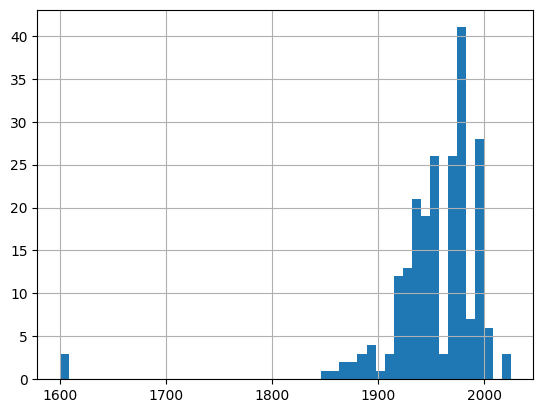

In [11]:
#According to the authorities, spruces do not deal well with rising temperatures so I check if they were less planted recently.
#There are different species of spruces, that's why I'm looking for all the species with "Fichte" in them.

#Link to the article: https://www.bernerzeitung.ch/eichen-statt-fichten-hitzeresistente-baeume-fuer-berner-waelder-237731790596

fichten_df = df_de[df_de["name_de"].str.contains("Fichte", case=False, na=False)]
fichten_df["pflanzjahr"].hist(bins=50)

<Axes: >

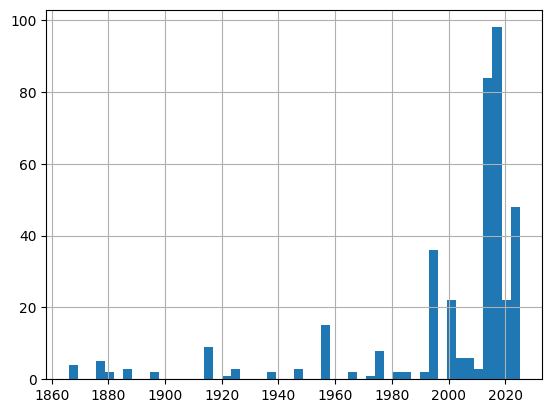

In [12]:
#In the same article, it says oaks are planted more often nowadays so I check on them too
eichen_df = df_de[df_de["name_de"].str.contains("Eiche", case=False, na=False)]
eichen_df["pflanzjahr"].hist(bins=50)

In [13]:
#I realized some trees didn't have values in "gattung" (genera), so i checked how many there are
df["gattung"].isna().value_counts()

gattung
False    9163
True       56
Name: count, dtype: int64

In [14]:
#In what years were they planted? Could this be relevant? After seeing the results, no.
gattung_isna = df[df["gattung"].isna()].sort_values("pflanzjahr")
#gattung_isna

In [15]:
#Checking the number of genera
df["gattung"].nunique()

68

In [16]:
#Getting the median year planted per genus
df_de.groupby("gattung")["pflanzjahr"].median()

gattung
Abies        1936.0
Acer         1986.0
Aesculus     1986.0
Ailanthus    1966.0
Albizia      2017.0
              ...  
Tilia        1993.0
Tsuga        1966.0
Ulmus        2017.0
Zelkova      2023.0
Zelkovia     2017.0
Name: pflanzjahr, Length: 68, dtype: float64

In [17]:
#What are all the genera?
print(df_de["gattung"].dropna().unique())

['Acer' 'Gleditsia' 'Robinia' 'Aesculus' 'Celtis' 'Platanus' 'Tilia'
 'Fraxinus' 'Carpinus' 'Pinus' 'Araucaria' 'Cedrus' 'Sequoiadendron'
 'Ulmus' 'Prunus' 'Populus' 'Alnus' 'Salix' 'Betula' 'Sophora' 'Juglans'
 'Liquidambar' 'Corylus' 'Cercis' 'Quercus' 'Parrotia' 'Gingko' 'Magnolia'
 'Fagus' 'Amelanchier' 'Liriodendron' 'Koelreuteria' 'Crataegus' 'Ostrya'
 'Picea' 'Sorbus' 'Morus' 'Malus' 'Cornus' 'Sambucus' 'Larix' 'Pyrus '
 'Pyrus' 'Rhus' 'Taxus' 'Lagerstroemia' 'Ilex' 'Paulownia' 'Taxodium'
 'Chamaecyparis' 'Tsuga' 'Catalpa' 'Cercidiphyllum' 'Davidia' 'Prunus '
 'Laburnum' 'Abies' 'Pterocarya' 'Castanea' 'Ailanthus' 'Gymnocladus'
 'Zelkova' 'Pseudotsuga' 'Thuja' 'Zelkovia' 'Carya' 'Nothofagus' 'Albizia']


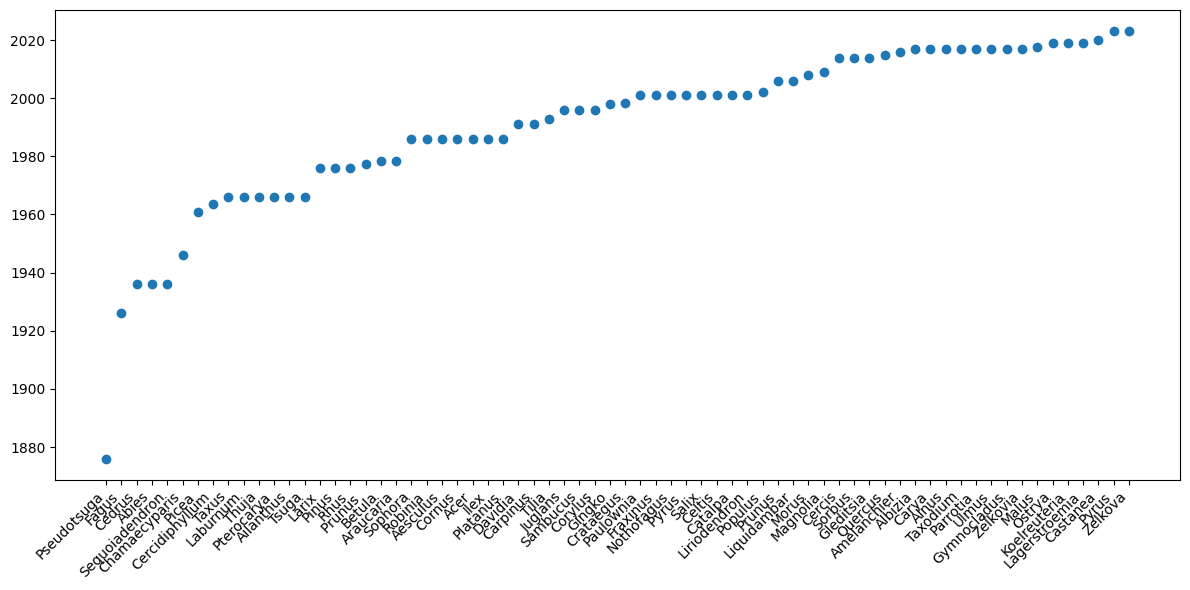

In [18]:
#What's the median year planted per genus, but in a scatterplot?

import matplotlib.pyplot as plt
median_pflanzjahr = df_de.groupby("gattung")["pflanzjahr"].median().sort_values()

plt.figure(figsize=(12, 6))
plt.scatter(median_pflanzjahr.index, median_pflanzjahr.values)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: >

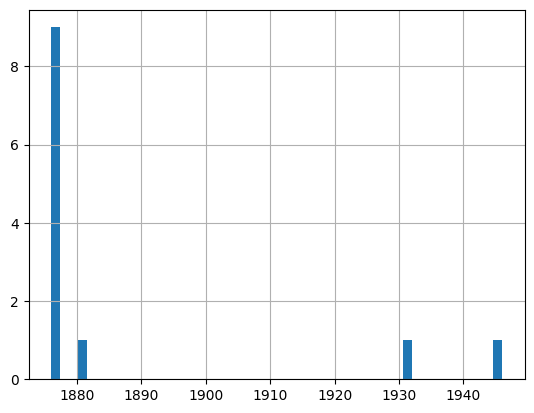

In [19]:
#Checking one species (the one that hasn't been planted recently)
df_de[df_de["name_de"] == "Douglasie"]["pflanzjahr"].hist(bins=50)

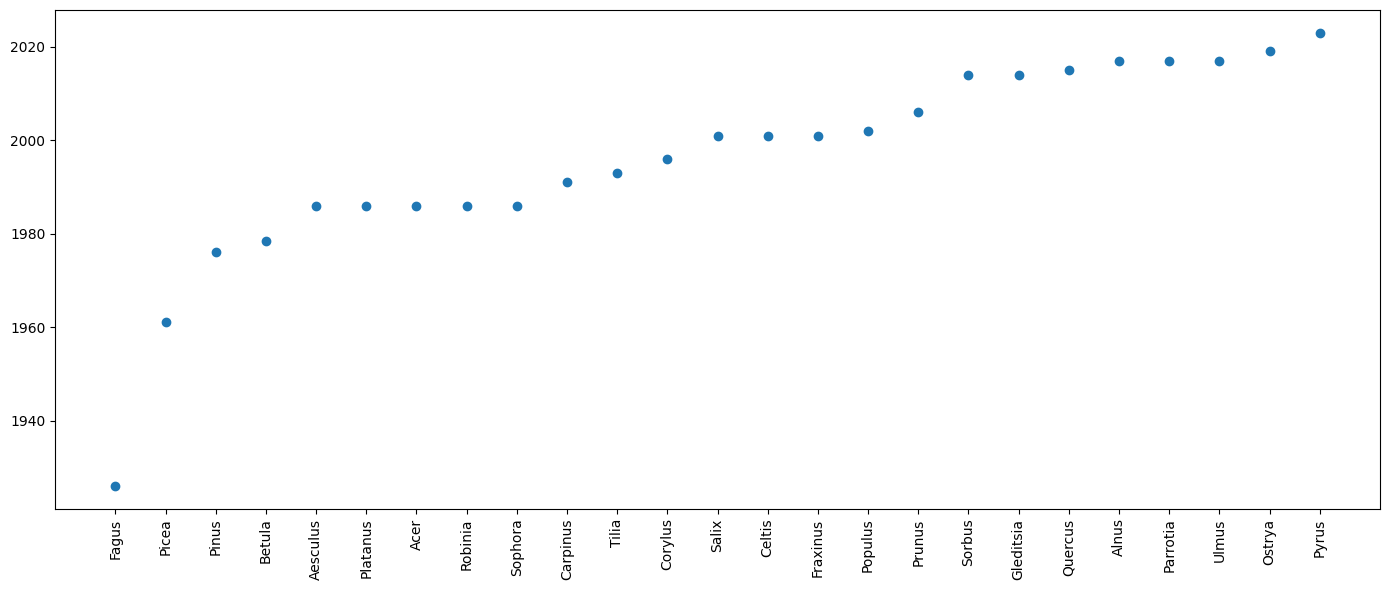

In [42]:
#Plot median year planted per genus and only showing genera with more than 50 trees.

counts = df_de["gattung"].value_counts()
relevante_gattungen = counts[counts > 50].index
df_relevant = df_de[df_de["gattung"].isin(relevante_gattungen)]

median_pflanzjahr = df_relevant.groupby("gattung")["pflanzjahr"].median().sort_values()

plt.figure(figsize=(14, 6))
plt.scatter(median_pflanzjahr.index, median_pflanzjahr.values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Axes: >

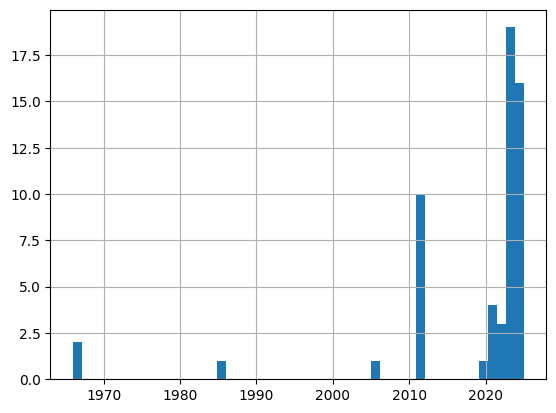

In [21]:
#Check on the "newest" genus shown above
df_de[df_de["gattung"] == "Pyrus"]["pflanzjahr"].dropna().astype(int).hist(bins=50)

In [22]:
#Getting rid of all the columns I don't need and the trees with unknown species.
df_cleaned = df_de.drop(columns=["h_2023", "typ_de", "kurzname", "oeko_wert", "stand", "t_id", "baumnr", "sorte", "aufnahmedatum", "faelldatum"])
df_cleaned = df_cleaned.dropna(subset=['name_de'])
df_cleaned = df_cleaned[df_cleaned['name_de'].str.strip() != 'unbekannt']

df_cleaned

,name_de,name_bot,gattung,art,status_de,pflanzjahr,e,n
0,Feldahorn,Acer campestre,Acer,campestre,Gepflanzt,2018,2586567.95,1219723.73
2,"Gleditschie, Lederhülsenbaum",Gleditsia triacanthos,Gleditsia,triacanthos,Gepflanzt,1986,2584483.45,1220439.05
3,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584492.52,1220435.00
4,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584498.72,1220432.24
5,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584503.94,1220429.92
...,...,...,...,...,...,...,...,...
9213,Eisenholzbaum,Parrotia persica,Parrotia,persica,Gepflanzt,2020,2586284.84,1219408.98
9214,Bergahorn,Acer pseudoplatanus,Acer,pseudoplatanus,Gepflanzt,2025,2585422.12,1219681.93
9215,Judasbaum,Cercis canadensis 'Forest Pansy',Cercis,canadensis,Gepflanzt,2019,2587494.41,1221636.42
9217,Schneeballblättriger Ahorn,Acer opalus,Acer,opalus,Gepflanzt,2025,2587313.81,1221710.25


In [23]:
#New dataframe with heatresistant and non-heatresistant species. Information from the authorities, based on their observations of long-established vegetation

df_hitzeresistent = pd.DataFrame({
    "Lateinischer Name": [
        "Acer opalus", "Acer monspessulanum", "Lagerstroemia", "Albizia julibrissin",
        "Cercis siliquastrum", "Cercis canadensis", "Quercus ilex", "Quercus suber",
        "Quercus hispanica", "Quercus cerris", "Quercus frainetto", "Quercus petraea",
        "Quercus pubescens", "Pinus maritima", "Castanea sativa", "Morus alba",
        "Parrotia persica", "Carya illinoinensis", "Gleditsia triacanthos",
        "Koelreuteria paniculata", "Sophora japonica"
    ],
    "Deutscher Name": [
        "Schneeblättriger Ahorn", "Montpellier-Ahorn", "Lagerströmie", "Seidenbaum",
        "Judasbaum", "Judasbaum (amerikanisch)", "Steineiche", "Korkeiche",
        "Spanische Eiche", "Traubeneiche", "Ungarische Eiche", "Stieleiche",
        "Flaumeiche", "See- oder Schirm-Kiefer", "Edelkastanie", "Maulbeerbaum",
        "Persischer Eisenholzbaum", "Pekannussbaum", "Gleditschie",
        "Blasenesche", "Schnurbaum"
    ]
})

df_nicht_hitzeresistent = pd.DataFrame({
    "Lateinischer Name": ["Betula", "Acer pseudoplatanus", "Fagus sylvatica", "Sorbus aucuparia"],
    "Deutscher Name": ["Birke", "Bergahorn", "Buche", "Eberesche"]
})

df_hitzeresistent
df_nicht_hitzeresistent

Hitzeresistente Bäume:
          Lateinischer Name            Deutscher Name
0               Acer opalus    Schneeblättriger Ahorn
1       Acer monspessulanum         Montpellier-Ahorn
2             Lagerstroemia              Lagerströmie
3       Albizia julibrissin                Seidenbaum
4       Cercis siliquastrum                 Judasbaum
5         Cercis canadensis  Judasbaum (amerikanisch)
6              Quercus ilex                Steineiche
7             Quercus suber                 Korkeiche
8         Quercus hispanica           Spanische Eiche
9            Quercus cerris              Traubeneiche
10        Quercus frainetto          Ungarische Eiche
11          Quercus petraea                Stieleiche
12        Quercus pubescens                Flaumeiche
13           Pinus maritima   See- oder Schirm-Kiefer
14          Castanea sativa              Edelkastanie
15               Morus alba              Maulbeerbaum
16         Parrotia persica  Persischer Eisenholzbaum
17   

,Lateinischer Name,Deutscher Name
0,Betula,Birke
1,Acer pseudoplatanus,Bergahorn
2,Fagus sylvatica,Buche
3,Sorbus aucuparia,Eberesche


In [24]:
#Merge them

df_hitzeresistent['hitzeresistent'] = True
df_hitzeresistent['nicht hitzeresistent'] = False

df_nicht_hitzeresistent['hitzeresistent'] = False
df_nicht_hitzeresistent['nicht hitzeresistent'] = True

df_merged = pd.merge(
    df_hitzeresistent,
    df_nicht_hitzeresistent,
    on='Lateinischer Name',
    how='outer',
    suffixes=('_resistent', '_nichtresistent')
)

df_merged['Deutscher Name'] = df_merged['Deutscher Name_resistent'].combine_first(df_merged['Deutscher Name_nichtresistent'])

df_merged['hitzeresistent'] = df_merged['hitzeresistent_resistent'].combine_first(df_merged['hitzeresistent_nichtresistent'])
df_merged['nicht hitzeresistent'] = df_merged['nicht hitzeresistent_resistent'].combine_first(df_merged['nicht hitzeresistent_nichtresistent'])

df_merged['hitzeresistent'] = df_merged['hitzeresistent'].fillna(False)
df_merged['nicht hitzeresistent'] = df_merged['nicht hitzeresistent'].fillna(False)

df_hitzeresistenz = df_merged[['Lateinischer Name', 'Deutscher Name', 'hitzeresistent', 'nicht hitzeresistent']]

C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\2009578976.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['hitzeresistent'] = df_merged['hitzeresistent'].fillna(False)
C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\2009578976.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged['nicht hitzeresistent'] = df_merged['nicht hitzeresistent'].fillna(False)


In [25]:
df_hitzeresistenz

,Lateinischer Name,Deutscher Name,hitzeresistent,nicht hitzeresistent
0,Acer monspessulanum,Montpellier-Ahorn,True,False
1,Acer opalus,Schneeblättriger Ahorn,True,False
2,Acer pseudoplatanus,Bergahorn,False,True
3,Albizia julibrissin,Seidenbaum,True,False
4,Betula,Birke,False,True
5,Carya illinoinensis,Pekannussbaum,True,False
6,Castanea sativa,Edelkastanie,True,False
7,Cercis canadensis,Judasbaum (amerikanisch),True,False
8,Cercis siliquastrum,Judasbaum,True,False
9,Fagus sylvatica,Buche,False,True


In [26]:
#Drop unneeded column
df_hitzeresistenz = df_hitzeresistenz.drop(columns=['Deutscher Name'])

In [27]:
#Merge new dataframe with original dataframe

df_cleaned['Gattung'] = df_cleaned['name_bot'].str.split().str[0].str.lower()
df_hitzeresistenz['Gattung'] = df_hitzeresistenz['Lateinischer Name'].str.split().str[0].str.lower()

df_final = pd.merge(
    df_cleaned,
    df_hitzeresistenz[['Lateinischer Name', 'hitzeresistent', 'nicht hitzeresistent']],
    left_on='name_bot',
    right_on='Lateinischer Name',
    how='left'
)

mask = (
    df_final['hitzeresistent'].isna() &
    df_final['nicht hitzeresistent'].isna() &
    (df_final['Gattung'] == 'betula')
)

#Birch trees were a pain because there are different species but the authorities just told me, it was "all birch species".
birken_flags = df_hitzeresistenz[df_hitzeresistenz['Gattung'] == 'betula'][['hitzeresistent', 'nicht hitzeresistent']].iloc[0]

df_final.loc[mask, 'hitzeresistent'] = birken_flags['hitzeresistent']
df_final.loc[mask, 'nicht hitzeresistent'] = birken_flags['nicht hitzeresistent']

df_final['hitzeresistent'] = df_final['hitzeresistent'].fillna(pd.NA)
df_final['nicht hitzeresistent'] = df_final['nicht hitzeresistent'].fillna(pd.NA)

In [28]:
#Get rid of unneeded columns
df_final = df_final.drop(columns=["nicht hitzeresistent", "Gattung"])

In [29]:
df_final_cleaned = df_final.drop(columns=["Lateinischer Name"])
df_final_cleaned

,name_de,name_bot,gattung,art,status_de,pflanzjahr,e,n,hitzeresistent
0,Feldahorn,Acer campestre,Acer,campestre,Gepflanzt,2018,2586567.95,1219723.73,<NA>
1,"Gleditschie, Lederhülsenbaum",Gleditsia triacanthos,Gleditsia,triacanthos,Gepflanzt,1986,2584483.45,1220439.05,True
2,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584492.52,1220435.00,<NA>
3,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584498.72,1220432.24,<NA>
4,"Robinie, Scheinakazie",Robinia pseudoacacia,Robinia,pseudoacacia,Gepflanzt,1986,2584503.94,1220429.92,<NA>
...,...,...,...,...,...,...,...,...,...
9158,Eisenholzbaum,Parrotia persica,Parrotia,persica,Gepflanzt,2020,2586284.84,1219408.98,True
9159,Bergahorn,Acer pseudoplatanus,Acer,pseudoplatanus,Gepflanzt,2025,2585422.12,1219681.93,False
9160,Judasbaum,Cercis canadensis 'Forest Pansy',Cercis,canadensis,Gepflanzt,2019,2587494.41,1221636.42,<NA>
9161,Schneeballblättriger Ahorn,Acer opalus,Acer,opalus,Gepflanzt,2025,2587313.81,1221710.25,True


In [30]:
#Checking if I've got all the non-heatresistant species
df_final_cleaned[df_final_cleaned["hitzeresistent"] == False]["name_de"].unique()

array(['Bergahorn', 'Sand-, Weissbirke', 'Birke Art unbekannt',
       'Rotbuche', 'Eberesche, Vogelbeere', 'Himalaja-Birke',
       'Papierbirke'], dtype=object)

In [31]:
#Checking if I've got all the heatresistant species
df_final_cleaned[df_final_cleaned["hitzeresistent"] == True]["name_de"].unique()

array(['Gleditschie, Lederhülsenbaum', 'Schnurbaum', 'Eisenholzbaum',
       'Schneeballblättriger Ahorn', 'Judasbaum', 'Blasenbaum',
       'Flaumeiche', 'Ungarische Eiche', 'Traubeneiche',
       'Weisser Maulbeerbaum', 'Zerreiche', 'Edelkastanie',
       'Französischer Ahorn', 'Pekannuss', 'Steineiche', 'Seidenbaum',
       'Korkeiche'], dtype=object)

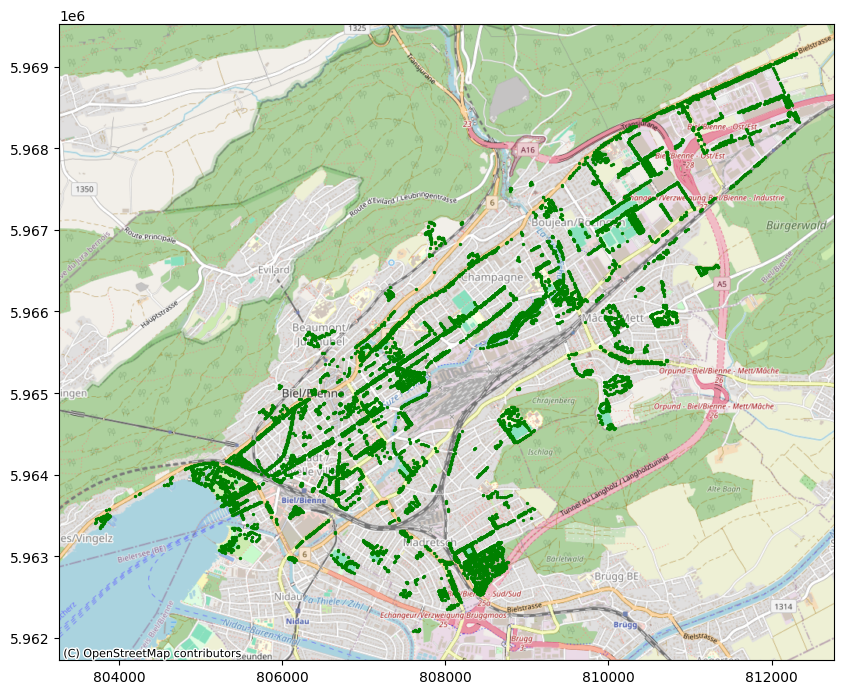

In [32]:
#Where are the trees located?

import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import pyproj

#Coordinates are not in lat/long but in the swiss coordination system, so I transform them
transformer = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:3857", always_xy=True)

df_valid = df_final.dropna(subset=["e", "n"])
df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)

geometry = [Point(xy) for xy in zip(df_valid["x_3857"], df_valid["y_3857"])]
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="green", markersize=2)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\2678900234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)
C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\2678900234.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)


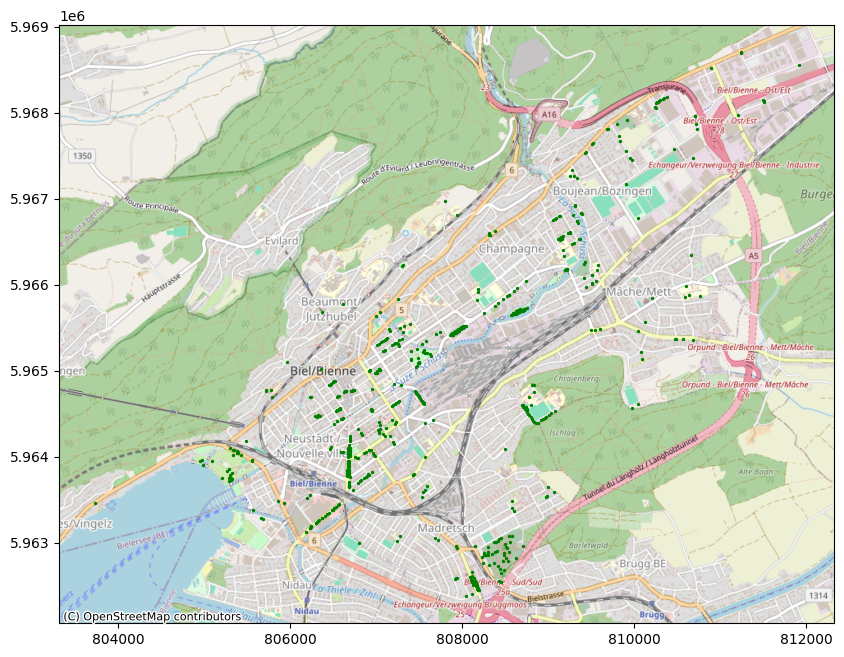

In [33]:
#Is there a pattern where they plant heatresistant trees? After looking at the results, no.

transformer = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:3857", always_xy=True)

df_valid = df_final_cleaned[(df_final_cleaned["hitzeresistent"] == True) & df_final["e"].notna() & df_final["n"].notna()]
df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)

geometry = [Point(xy) for xy in zip(df_valid["x_3857"], df_valid["y_3857"])]
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="green", markersize=2)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\3960082055.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)
C:\Users\amdw\AppData\Local\Temp\ipykernel_25788\3960082055.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)


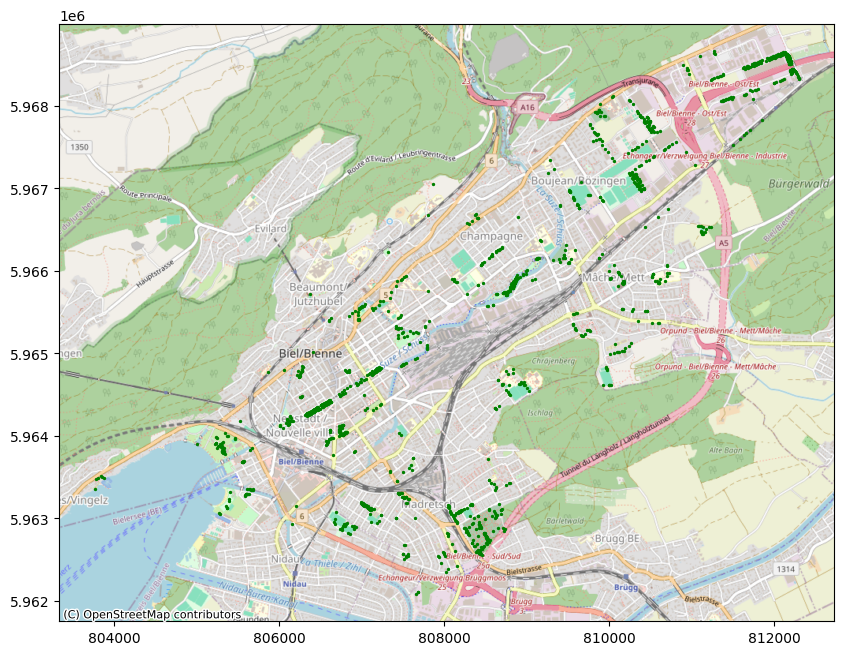

In [34]:
#Is there a pattern where there are non-heatresistant trees? After looking at the results, no

transformer = pyproj.Transformer.from_crs("EPSG:2056", "EPSG:3857", always_xy=True)

df_valid = df_final_cleaned[(df_final_cleaned["hitzeresistent"] == False) & df_final["e"].notna() & df_final["n"].notna()]
df_valid["x_3857"], df_valid["y_3857"] = transformer.transform(df_valid["e"].values, df_valid["n"].values)

geometry = [Point(xy) for xy in zip(df_valid["x_3857"], df_valid["y_3857"])]
gdf = gpd.GeoDataFrame(df_valid, geometry=geometry, crs="EPSG:3857")

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color="green", markersize=2)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [36]:
#Make a list with translated tree names (used AI to do it) because my dataframes only contains german and french tree names. I didn't end up needing this.

translations = [
    ("Feldahorn", "Field Maple"),
    ("Gleditschie, Lederhülsenbaum", "Honey Locust"),
    ("Robinie, Scheinakazie", "Black Locust"),
    ("Rosskastanie", "Horse Chestnut"),
    ("Rotblühende Rosskastanie", "Red Horse Chestnut"),
    ("Zürgelbaum", "Nettle Tree"),
    ("Platane", "Plane Tree"),
    ("Ungarische Silberlinde", "Hungarian Silver Linden"),
    ("Spitzahorn", "Norway Maple"),
    ("Linde", "Linden"),
    ("Esche", "Ash"),
    ("Haarrosskastanie", "Hairy Horse Chestnut"),
    ("Kaiser-Linde", "Emperor Linden"),
    ("Gelbe Pavie", "Yellow Buckeye"),
    ("Hainbuche, Weissbuche", "Hornbeam"),
    ("Schwarzkiefer", "Black Pine"),
    ("Schmucktanne", "Ornamental Fir"),
    ("Himalajazeder", "Himalayan Cedar"),
    ("Mammutbaum", "Giant Sequoia"),
    ("Winterlinde", "Small-leaved Linden"),
    ("Berg-Ulme", "Mountain Elm"),
    ("Blut-Pflaume", "Purple-leaf Plum"),
    ("Rotblättriger Bergahorn", "Red-leaved Sycamore Maple"),
    ("Italienische Säulenpappel", "Italian Columnar Poplar"),
    ("Rot-Erle, Schwarz-Erle", "Red or Black Alder"),
    ("Silberweide", "Silver Willow"),
    ("Vogelkirsche, Süsskirsche", "Wild Cherry"),
    ("Bergahorn", "Sycamore Maple"),
    ("Sand-, Weissbirke", "Silver Birch"),
    ("Manna-, Blumenesche", "Manna Ash"),
    ("Schnurbaum", "Pagoda Tree"),
    ("Schwarzpappel", "Black Poplar"),
    ("Scharlach-Kirsche", "Scarlet Cherry"),
    ("Walnussbaum", "Walnut"),
    ("Amberbaum", "Sweetgum"),
    ("Baumhasel", "Turkish Hazel"),
    ("Judasbaum", "Judas Tree"),
    ("Silberahorn", "Silver Maple"),
    ("Amerikanische Roteiche", "Red Oak"),
    ("Eisenholzbaum", "Ironwood"),
    ("Schneeballblättriger Ahorn", "Viburnum-leaved Maple"),
    ("Gingko", "Ginkgo"),
    ("Kobushi Magnolie", "Kobushi Magnolia"),
    ("Stieleiche", "English Oak"),
    ("Kastanie", "Chestnut"),
    ("Birke Art unbekannt", "Birch (species unknown)"),
    ("Sommerlinde", "Large-leaved Linden"),
    ("Rotbuche", "Copper Beech"),
    ("Schnee-Felsenbirne", "Snowy Amelanchier"),
    ("Tulpenbaum", "Tulip Tree"),
    ("Japanische Zierkirsche", "Japanese Ornamental Cherry"),
    ("Blasenbaum", "Golden Rain Tree"),
    ("Weissdorn, Art unbekannt", "Hawthorn (species unknown)"),
    ("Schmalblättrige Esche", "Narrow-leaved Ash"),
    ("Gemeine Kiefer, Föhre", "Scots Pine"),
    ("Hopfenbuche", "Hop Hornbeam"),
    ("Fichte", "Spruce"),
    ("Elsbeere", "Service Tree"),
    ("Gall-Eiche, Aleppo-Eiche", "Aleppo Oak"),
    ("Oxelbeere", "Serviceberry"),
    ("Traubenkirsche", "Bird Cherry"),
    ("Felsenbirne", "Juneberry"),
    ("Schwarzer Maulbeerbaum", "Black Mulberry"),
    ("Grau-Erle, Weiss-Erle", "Gray or White Alder"),
    ("Silberpappel", "Silver Poplar"),
    ("Japanische Säulen-Zierkirsche", "Japanese Columnar Ornamental Cherry"),
    ("Kanadische Pappel", "Canadian Poplar"),
    ("Salweide", "Goat Willow"),
    ("Zier-Apfelbaum", "Crab Apple"),
    ("Kornelkirsche, Tierlibaum", "Cornelian Cherry"),
    ("Flaumeiche", "Downy Oak"),
    ("Ungarische Eiche", "Hungarian Oak"),
    ("Blutbuche (Veredlung)", "Copper Beech (Grafted)"),
    ("Kirsche", "Cherry"),
    ("Eschenahorn", "Box Elder"),
    ("Eberesche, Vogelbeere", "Rowan"),
    ("Schwarzer Holunder", "Elder"),
    ("Europäische Lärche", "European Larch"),
    ("Traubeneiche", "Sessile Oak"),
    ("Zuckerahorn", "Sugar Maple"),
    ("Zierkirsche", "Ornamental Cherry"),
    ("Birne", "Pear"),
    ("Chinesische Wild-Birne", "Chinese Wild Pear"),
    ("Bergföhre", "Mountain Pine"),
    ("Essigbaum", "Staghorn Sumac"),
    ("Eibe", "Yew"),
    ("Trauerweide", "Weeping Willow"),
    ("Graupappel", "Grey Poplar"),
    ("Grossblatt- Pappel", "Large-leaved Poplar"),
    ("Zitterpappel, Espe", "Aspen"),
    ("Purpurweide", "Purple Willow"),
    ("Mehlbeere", "Whitebeam"),
    ("Weide (Art unbekannt)", "Willow (species unknown)"),
    ("Magnolie Art unbekannt", "Magnolia (species unknown)"),
    ("Chinesische Kräuselmyrte", "Chinese Fringe Tree"),
    ("Holländische Linde", "Dutch Linden"),
    ("Atlaszeder", "Atlas Cedar"),
    ("Stechpalme", "Holly"),
    ("Blauglockenbaum", "Empress Tree"),
    ("Fichte Art unbekannt", "Spruce (species unknown)"),
    ("Grossblütige Magnolie", "Large-flowered Magnolia"),
    ("Blutbuche", "Copper Beech"),
    ("Ulme", "Elm"),
    ("Sumpfzypresse", "Bald Cypress"),
    ("Scheinzypresse genaue Art unbekannt", "False Cypress (species unknown)"),
    ("Hemlockstanne", "Hemlock Fir"),
    ("Trompetenbaum", "Catalpa"),
    ("Katsurabaum, Kuchenbaum", "Katsura Tree"),
    ("Taubenbaum, Taschentuchbaum", "Dove Tree, Handkerchief Tree"),
    ("Weisser Maulbeerbaum", "White Mulberry"),
    ("Himalaja-Birke", "Himalayan Birch"),
    ("Kiefer Art unbekannt", "Pine (species unknown)"),
    ("Säuleneiche", "Columnar Oak"),
    ("Zwetschge", "Damson Plum"),
    ("Zerreiche", "Turkey Oak"),
    ("Papierbirke", "Paper Birch"),
    ("Frühjahrskirsche", "Spring Cherry"),
    ("Feldulme", "Field Elm"),
    ("Apfel", "Apple"),
    ("Goldregen", "Laburnum"),
    ("Himalaja-Ahorn", "Himalayan Maple"),
    ("Rotahorn", "Red Maple"),
    ("Italienische Erle", "Italian Alder"),
    ("Tanne (Art unbekannt)", "Fir (species unknown)"),
    ("Flügelnuss", "Wingnut"),
    ("Ahorn", "Maple"),
    ("Edelkastanie", "Sweet Chestnut"),
    ("Tatarischer Steppen-Ahorn", "Tatarian Maple"),
    ("Dreizähne Ahorn", "Three-toothed Maple"),
    ("Schwarzdorn", "Blackthorn"),
    ("Götterbaum", "Tree of Heaven"),
    ("Geweihbaum", "Staghorn Sumac"),
    ("Rotblühende Rosskastanie, gefüllt", "Red Horse Chestnut (cultivated)"),
    ("Zelkovie", "Zelkova"),
    ("Herbstblühende Schnee-Kirsche", "Autumn-flowering Snow Cherry"),
    ("Französischer Ahorn", "French Maple"),
    ("Douglasie", "Douglas Fir"),
    ("Serbische Fichte", "Serbian Spruce"),
    ("Scheinzypresse", "False Cypress"),
    ("Lebensbaum", "Arborvitae"),
    ("Fächerahorn", "Field Maple"),
    ("Hemlockstanne (Art unbekannt)", "Hemlock Fir (species unknown)"),
    ("Nordmannstanne", "Nordmann Fir"),
    ("Pappel", "Poplar"),
    ("Weisstanne", "White Fir"),
    ("Zirbelkiefer", "Swiss Pine"),
    ("Libanonzeder", "Lebanon Cedar"),
    ("Amerikanischer Blumen-Hartriegel", "American Dogwood"),
    ("Grüne Häng-Buche", "Green Weeping Beech"),
    ("Schwarzrote Hänge-Buche", "Black-red Weeping Beech"),
    ("Hängende Kätzchen-Weide", "Weeping Pussy Willow"),
    ("Flatter-Ulme", "Wych Elm"),
    ("Pekannuss", "Pecan"),
    ("Scharlacheiche", "Scarlet Oak"),
    ("Eisenholzbaum, schmalkronig", "Ironwood (narrow-crowned)"),
    ("Scheinbuche", "Hornbeam"),
    ("Skandinavische Mehlbeere", "Scandinavian Whitebeam"),
    ("Steineiche", "Stone Oak"),
    ("Rosskastanie, gefüllt", "Horse Chestnut (cultivated)"),
    ("Seidenbaum", "Silk Tree"),
    ("Schnee- Felsenbirne", "Snowy Amelanchier"),
    ("Ahorn Freemanii", "Freeman Maple"),
    ("Mandelbaum", "Almond"),
    ("Pinie", "Stone Pine"),
    ("Tränen Kiefer", "Weeping Pine"),
    ("Siskiyou Fichte", "Siskiyou Spruce"),
    ("Kolchischer Ahorn", "Colchic Maple"),
    ("Korkeiche", "Cork Oak")
]

df_translations = pd.DataFrame(translations, columns=["name_de", "name_en"])

#Merge translations with my dataframe
df_EN = df_final_cleaned.merge(df_translations, on="name_de", how="left")

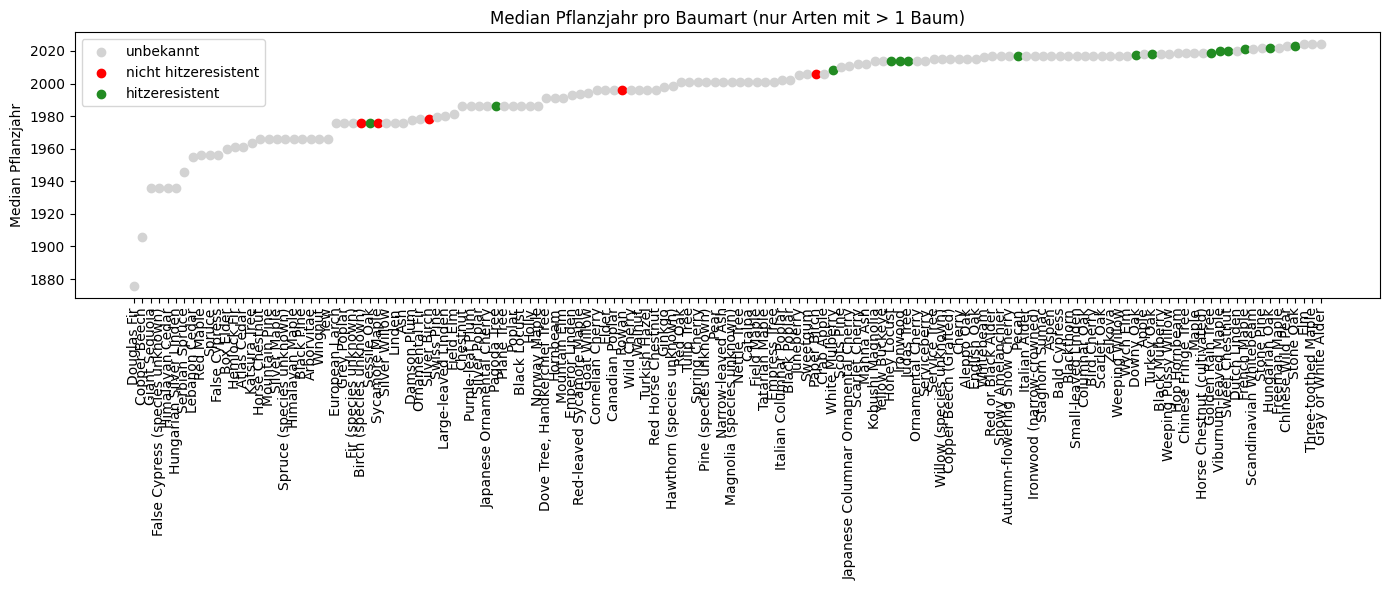

In [43]:
#Make scatterplot like the one above, but with (non-) heat resistant trees in a different color

#I was playing around with only larger groups of trees
counts = df_EN["name_en"].value_counts()
relevante_namen = counts[counts > 1].index
df_relevant = df_EN[df_EN["name_en"].isin(relevante_namen)]

median_pflanzjahr = df_relevant.groupby("name_en")["pflanzjahr"].median().sort_values()

hitzeresistenz_status = df_relevant.groupby("name_en")["hitzeresistent"].agg(
    lambda x: True if x.eq(True).any()
    else (False if x.eq(False).all()
    else "NaN")
)

plt.figure(figsize=(14, 6))

for name, jahr in median_pflanzjahr.items():
    status = hitzeresistenz_status.get(name, "NaN")
    
    if status == True:
        plt.scatter(name, jahr, color="forestgreen", label="hitzeresistent" if 'hitzeresistent' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif status == False:
        plt.scatter(name, jahr, color="red", label="nicht hitzeresistent" if 'nicht hitzeresistent' not in plt.gca().get_legend_handles_labels()[1] else "")
    else:
        plt.scatter(name, jahr, color="lightgray", label="unbekannt" if 'unbekannt' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.xticks(rotation=90)
plt.ylabel("Median Pflanzjahr")
plt.title("Median Pflanzjahr pro Baumart (nur Arten mit > 1 Baum)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#After going through everything again (and exporting various variations for Datawrapper), I decide for the shares of (non-) heat resistant trees.

df_relevant["hitzeresistent_kategorie"] = df_relevant["hitzeresistent"].map({
    True: "heat resistant",
    False: "not heat resistant"
}).fillna("unknown")

df_grouped = df_relevant.groupby(["jahr", "hitzeresistent_kategorie"]).size().reset_index(name="count")
df_pivot = df_grouped.pivot(index="jahr", columns="hitzeresistent_kategorie", values="count").fillna(0)
df_pivot["total"] = df_pivot.sum(axis=1)

df_pivot["heat resistant pct"] = df_pivot["heat resistant"] / df_pivot["total"] * 100
df_pivot["not heat resistant pct"] = df_pivot["not heat resistant"] / df_pivot["total"] * 100

df_final = df_pivot.reset_index()[["jahr", "total", "heat resistant pct", "not heat resistant pct"]]

#Finally, exporting to CSV
df_final.to_csv("chart_def.csv", index=False)